House Prices: Advanced Regression Techniques

In [179]:
import numpy as np
import pandas as pd
import warnings
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [180]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [181]:
train = pd.read_csv('house_prices_train.csv', sep=',')
test = pd.read_csv('house_prices_test.csv', sep=',')

In [182]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


сразу посмотрим на пустоту

In [184]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [185]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [186]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


**Первый вывод, по большинству данных за Null  принимается отстутвсие сабжекта, что собственно не совсем верно. потому часть придется преобразовать в категорию - "absent"**

ну хоть метки не пустые. первые 4 сразу удалим. Камин удалять не хочу. люблю камины. будем смотреть

In [187]:
missing_values_table(train)[0:4].index

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [188]:
train=train.drop(missing_values_table(train)[0:4].index, axis=1)
test=test.drop(missing_values_table(test)[0:4].index, axis=1)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


In [189]:
train.shape, test.shape

((1460, 77), (1459, 76))

Посмотрим на корреляцию числовых признаков с целевым. 

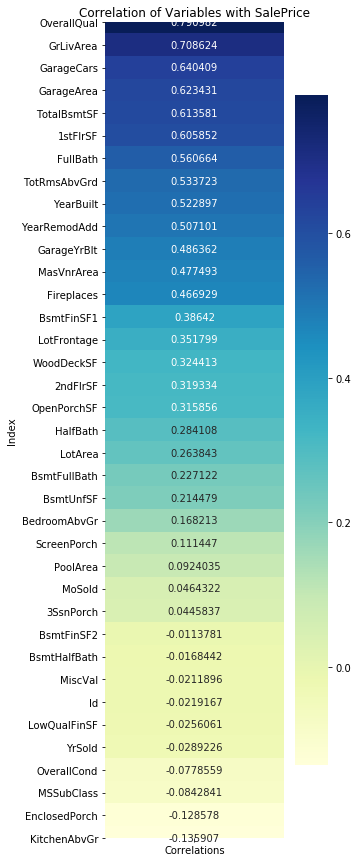

In [190]:
corr = train.corrwith(train['SalePrice'])[:-1].reset_index()
corr.columns = ['Index', 'Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with SalePrice");

как видно, очень высокая корреляция прзинако "Гараж" с целевым. так же достоточная корреляция у признака "LotFrontage". Дропать не будем. 

**посмотрим на баланс значений по признакам**

In [191]:
for i in train.columns:
    if train[i].value_counts().shape[0] < 4:
        print(train[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


удаляем Utilities и Street

In [192]:
train=train.drop(['Utilities', 'Street'], axis=1)
test=test.drop(['Utilities', 'Street'], axis=1)

**Fireplace**

In [193]:
for dataset in [train, test]:
    dataset['FireplaceQu'] =  dataset['FireplaceQu'].fillna('absent')


**LotFrontag**

In [194]:
for dataset in [train, test]:
    dataset['LotFrontage'] =  dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

**Garage**

In [195]:
for dataset in [train, test]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        dataset[col] = dataset[col].fillna('absent')


In [196]:
for dataset in [train, test]:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

**Basement**

In [197]:
for dataset in [train, test]:
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        dataset[col] = dataset[col].fillna('absent')

**MasVnr**

кладку заменим самым популярным типом

In [198]:
for dataset in [train, test]:
    for col in ('MasVnrType','MasVnrArea'):
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


**Остальное**

заменим по документации и модой

In [199]:
for dataset in [train, test]:
    dataset['Electrical'] = dataset['Electrical'].fillna("SBrkr")
    dataset['Functional'] = dataset['Functional'].fillna("Typ")
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna("TA")
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
    dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
    dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mode()[0])
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mode()[0])
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mode()[0])
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mode()[0])
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mode()[0])
    
   

**Engineering**



**посмотрим на корреляцию м/у признаками( видно что есть например, год постройи дома и гаража) - удалим ненужные/преобразуем в новые**

In [200]:
from feature_selector import FeatureSelector

In [201]:
fs = FeatureSelector(data = train.drop(columns=['SalePrice']), labels = train['SalePrice'])

In [202]:
fs.identify_collinear(correlation_threshold = 0.6)

9 features with a correlation magnitude greater than 0.60.



In [203]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,1stFlrSF,TotalBsmtSF,0.819530
1,GrLivArea,2ndFlrSF,0.687501
2,BsmtFullBath,BsmtFinSF1,0.649212
3,FullBath,GrLivArea,0.630012
4,HalfBath,2ndFlrSF,0.609707
5,TotRmsAbvGrd,2ndFlrSF,0.616423
6,TotRmsAbvGrd,GrLivArea,0.825489
7,TotRmsAbvGrd,BedroomAbvGr,0.676620
8,GarageYrBlt,YearBuilt,0.825667
9,GarageYrBlt,YearRemodAdd,0.642277


    1. год постройки гаража коррелируется с годом постройки дома - удалим
    2. много ванн/коррелируют -  сложим признаки (обычно важно сколько всего ванн)
    3. есть общая площадь над землей/есть подвал/есть ванные/кухя. проверить равентсно (модет оставить только жилую). посмотреть на корреляцию
    4. Подвал - есть понятие как заверженный и не завершенный. посмотреть на долю есил незавершенны- очень мало - удалим
    5. есть территории снаружи дома/стоит объединить.

In [204]:
corr

,Correlations
Index,
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


сложим ванные вместе

In [205]:
for dataset in [train, test]:
    dataset['FullBathroom']=(dataset['FullBath'] + (0.5*dataset['HalfBath']) + 
                               dataset['BsmtFullBath'] + (0.5*dataset['BsmtHalfBath']))

проверим площадь

как видим - равенство - думаю стоить удалить этажи / оставитв данные только об общей жилой площади

In [206]:
print(train['GrLivArea'].sum(), train['1stFlrSF'].sum(), train['2ndFlrSF'].sum())

2212577 1697435 506609


Подвал 53% недостроя. думаю в тотале. притом что тотал имеет очень сильную корреляцию на метку - предлагаю оставитть только законченную площать и не законченную

п.с. очень странно, что суммы не сходятся

In [207]:
train['BsmtUnfSF'].sum()/train['TotalBsmtSF'].sum()

0.536433338277692

In [208]:
print(train['TotalBsmtSF'].sum(), train['BsmtUnfSF'].sum(), train['BsmtFinSF1'].sum(),train['BsmtFinSF2'].sum())

1543847 828171 647714 67962


In [209]:
for dataset in [train, test]:
    dataset['Total_fin'] = (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'])

объеденим терр. снаружи

In [210]:
for dataset in [train, test]:
    dataset['outside'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] +
                             dataset['EnclosedPorch'] + dataset['ScreenPorch'] +
                             dataset['WoodDeckSF'])

MSSubClass - не число / заменим тип

In [211]:
for dataset in [train, test]:
    dataset['MSSubClass'] = dataset['MSSubClass'].astype('object')

цена по годам

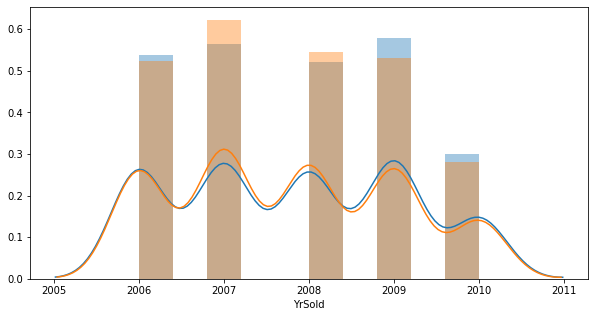

In [212]:
plt.figure(figsize=(10,5))
sns.distplot(train['YrSold'],bins=10)
sns.distplot(test['YrSold'],bins=10)
plt.show()


Как видим, цены предсавлены за 5 лет. Идея состоит в следующем:
Зная, что цены в США росли до лета 2007 года, а далее в 2008 начали падать (https://fred.stlouisfed.org/series/USSTHPI). Думается стоит заменть даты продаж на группы (до кризиза и после - два периода падения с 2008 по 2009 и после 2009

In [213]:
train['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [214]:
test['YrSold'].value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

In [215]:
for dataset in [train, test]:
    dataset['crysis'] = dataset['YrSold'].map({2006: 1, 2007: 1, 2008: 2, 2009: 3, 2010: 3}).fillna(0)
    
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FullBathroom,Total_fin,outside,crysis
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,3.5,706,61,2
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,2.5,978,298,1
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,3.5,486,42,2
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,2.0,216,307,1
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,3.5,655,276,2


In [216]:
train['crysis'].value_counts()

1    643
3    513
2    304
Name: crysis, dtype: int64

In [217]:
for dataset in [train, test]:
    dataset['crysis'] = dataset['crysis'].astype('object')

In [218]:
train1=train.copy()
test1=test.copy()

In [219]:
col=['OpenPorchSF','3SsnPorch', 'EnclosedPorch','ScreenPorch','WoodDeckSF',
     'TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GarageYrBlt',
     'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','Id','MoSold','YrSold','PoolArea']

In [220]:
train1=train1.drop(col,axis=1)
test1=test1.drop(col,axis=1)    

In [221]:
missing_values_table(test1)

Your selected dataframe has 59 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
FullBathroom,2,0.1


In [222]:
for dataset in [train1, test1]:
    dataset['FullBathroom'] = dataset['FullBathroom'].fillna(dataset['FullBathroom'].mode()[0])

**нормализуем признаки/посмотрим на распределение метки**

In [223]:
from scipy.stats import skew

In [224]:
train_features=train1.drop(columns=['SalePrice'])

In [225]:
features = pd.concat([train_features, test1]).reset_index(drop=True)
features.shape

(2919, 59)

In [226]:
Y = train1['SalePrice'].reset_index(drop=True).copy()

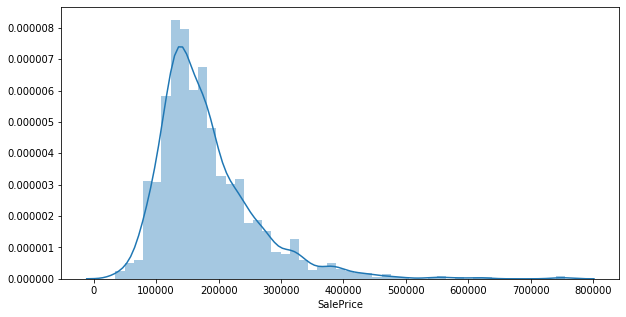

In [227]:
plt.figure(figsize=(10,5))
sns.distplot(Y)
plt.show()



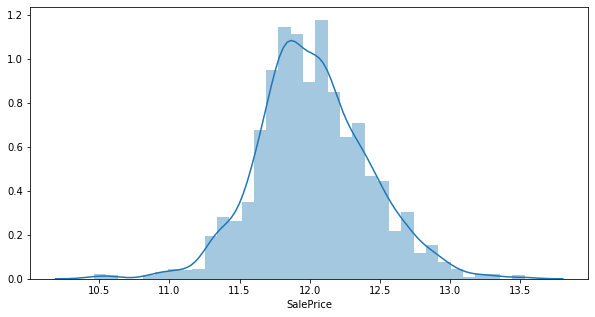

In [228]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(Y))
plt.show()


In [229]:
Y=np.log(Y)

проверим на выбросы. заюзаем холма

In [230]:
features_out = pd.get_dummies(train_features).reset_index(drop=True)


In [231]:
import statsmodels

In [232]:
import statsmodels.api as sm

In [233]:
ols=sm.OLS(endog = Y, exog = features_out)

In [234]:
fit = ols.fit()

In [57]:
outlines=fit.outlier_test('holm')

In [235]:
outlines[outlines['holm(p)']<0.01]

,student_resid,unadj_p,holm(p)
88,5.469108,5.481498e-08,7.975579e-05
462,-6.731386,2.579059e-11,3.757689e-08
523,-10.793943,5.254646e-26,7.671783e-23
632,-7.191744,1.112402e-12,1.621882e-09
825,10.793943,5.254646e-26,7.671783e-23
968,-5.014777,6.093803e-07,8.860390e-04
970,4.678126,3.217671e-06,4.675276e-03
1324,-6.234922,6.215377e-10,9.049588e-07


уровень за-ти 0,01 - удалим выбросы

In [236]:
out=outlines[outlines['holm(p)']<0.01].index

нормализуем вещ признаки

In [237]:
numeriсs = ['int64', 'float64']

num = []
cat=[]
for i in features.columns:
    if features[i].dtype in numeriсs:
        
        num.append(i)
    else:
        cat.append(i)

In [238]:
skew_features = features[num].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features

MiscVal         21.947195
LotArea         12.822431
LowQualFinSF    12.088761
KitchenAbvGr     4.302254
MasVnrArea       2.613592
LotFrontage      1.672470
outside          1.376649
GrLivArea        1.269358
Total_fin        1.178646
BsmtUnfSF        0.919339
TotRmsAbvGrd     0.758367
Fireplaces       0.733495
OverallCond      0.570312
FullBathroom     0.493852
BedroomAbvGr     0.326324
GarageArea       0.239257
OverallQual      0.197110
GarageCars      -0.219581
YearRemodAdd    -0.451020
YearBuilt       -0.599806
dtype: float64

выберем признаки со скосом от 0,5 и нормальизуем ( до этого посчитаем оптимальый параметр лямбда с помощью boxcox_normmax)
для нормализации восользуемся boxcox1p а не boxcox (т.к. в данных есть нули - и будет вылетать в бесконечно при приобразовани)

In [239]:
from scipy.special import boxcox1p

In [240]:
from scipy.stats import boxcox_normmax

In [241]:
high_skew = skew_features[abs(skew_features) > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i]= boxcox1p(features[i], boxcox_normmax(features[i]+1))



In [242]:
features[num].apply(lambda x: skew(x)).sort_values(ascending=False)


LowQualFinSF    8.495602
MiscVal         5.239894
KitchenAbvGr    3.779896
MasVnrArea      0.976354
Fireplaces      0.554522
FullBathroom    0.493852
Total_fin       0.401213
OverallCond     0.383000
BedroomAbvGr    0.326324
GarageArea      0.239257
OverallQual     0.197110
outside         0.186593
BsmtUnfSF       0.054203
LotFrontage     0.051218
TotRmsAbvGrd    0.047226
GrLivArea       0.004848
LotArea        -0.135401
GarageCars     -0.219581
YearBuilt      -0.254677
YearRemodAdd   -0.451020
dtype: float64

In [243]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2919, 284)

In [244]:
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 284 entries, LotFrontage to crysis_3
dtypes: float64(17), int64(3), uint8(264)
memory usage: 1.2 MB


In [245]:
train_fin = final_features.iloc[:len(Y)]
test_fin = final_features.iloc[len(Y):]
print(train_fin.shape,Y.shape,test_fin.shape)

(1460, 284) (1460,) (1459, 284)


In [246]:
train_fin=train_fin.drop(out)

In [247]:
Y=Y.drop(out)

In [248]:
print(train_fin.shape,Y.shape,test_fin.shape)

(1452, 284) (1452,) (1459, 284)


In [249]:
train_fin['SalePrice']=Y

In [250]:
X=train_fin.drop(columns=['SalePrice'])

In [251]:
missing_values_table(train_fin)

Your selected dataframe has 285 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


проверим на оверфит и удалим признаки с сильным перекосом значений 

In [252]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [253]:
overfit

['MSSubClass_150', 'Condition2_PosN']

In [254]:
train_final = train_fin.drop(overfit, axis=1)
test_final = test_fin.drop(overfit, axis=1)

In [255]:
train_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,crysis_1,crysis_2,crysis_3,SalePrice
0,13.384628,13.424521,7,3.989638,3.035191e+51,2003,19.378556,30.016556,0.0,7.234115,...,0,0,0,0,1,0,0,1,0,12.247694
1,14.974427,13.694528,6,5.996435,2.444491e+51,1976,0.000000,44.178890,0.0,6.947212,...,0,0,0,0,1,0,1,0,0,12.109011
2,13.716619,14.034134,7,3.989638,2.987217e+51,2002,17.721068,56.957798,0.0,7.275132,...,0,0,0,0,1,0,0,1,0,12.317167
3,12.813279,13.683422,7,3.989638,1.482547e+51,1970,0.000000,64.881740,0.0,7.237969,...,1,0,0,0,0,0,1,0,0,11.849398
4,15.371758,14.550143,8,3.989638,2.963498e+51,2000,25.323125,61.233861,0.0,7.470741,...,0,0,0,0,1,0,0,1,0,12.429216


**Baseline**

**Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)**

In [256]:
train_final=train_final.drop('SalePrice',axis=1)

In [257]:
from sklearn import ensemble, tree, linear_model,model_selection
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [258]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [259]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LassoLarsIC

In [260]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

In [261]:
regressor = linear_model.ElasticNet(random_state = 0)

In [262]:
regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [263]:
parameters_grid = {
    
    'l1_ratio' : np.linspace(0.8, 1.3, num = 50),
    'alpha' : np.linspace(0.0001, 0.01, num = 100), 
    
    
}


In [264]:
grid_cv = model_selection.GridSearchCV(regressor, parameters_grid, scoring = 'r2', cv = kfolds)

In [265]:
grid_cv

GridSearchCV(cv=KFold(n_splits=10, random_state=23, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=0, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001, 0.0002,...
       1.05510204, 1.06530612, 1.0755102 , 1.08571429, 1.09591837,
       1.10612245, 1.11632653, 1.12653061, 1.13673469, 1.14693878,
       1.15714286, 1.16734694, 1.17755102, 1.1877551 , 1.19795918,
       1.20816327, 1.21836735, 1.22857143, 1.23877551, 1.24897959,
       1.25918367, 1.26938776, 1.27959184, 1.28979592, 1.3       ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2

In [266]:
#grid_cv.fit(train_final, Y)

In [267]:
#grid_cv.best_estimator_

In [268]:
#print (grid_cv.best_score_) 
#print (grid_cv.best_params_)

In [269]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_final, Y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = 5))
    return(rmse)



In [270]:
ENet = linear_model.ElasticNet(alpha=0.0008, l1_ratio=1.01)

In [271]:
score = cv_rmse(ENet)
print("ElasticNet score: {:.4f}".format(score.mean()))

ElasticNet score: 0.1138


In [272]:
elastic_model = ENet.fit(train_final, Y)

In [273]:
Final = np.exp(elastic_model.predict(test_final))

In [274]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final}).to_csv('houses.csv', index =False)

**Сетка**

In [275]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

сделаем выборку для проверки/отскалируем выуборку (требуется для тензера иначе nan выдает)

In [276]:
train_flow = train_final.copy()

In [277]:
train_flow['Sales']=Y

In [278]:
train_dataset = train_flow.sample(frac=0.8, random_state=0)

In [279]:
test_dataset = train_flow.drop(train_dataset.index)

In [280]:
train_labels = train_dataset.pop('Sales')
test_labels = test_dataset.pop('Sales')

In [281]:
normed_train_data = preprocessing.scale(train_dataset)
normed_test_data = preprocessing.scale(test_dataset)

In [282]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [283]:
model = build_model()

In [284]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                18112     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 22,337
Trainable params: 22,337
Non-trainable params: 0
_________________________________________________________________


In [285]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.5264662 ],
       [ 0.01142856],
       [-0.17025231],
       [ 0.54787326],
       [ 0.20477167],
       [-0.5095841 ],
       [ 0.08801877],
       [-0.4429316 ],
       [-0.05882472],
       [-0.6340553 ]], dtype=float32)

In [286]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print(epoch)
        print('.', end='')

In [287]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [log(SalePrice)]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$log(SalePrice)$]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

In [288]:

model = build_model()

EPOCHS = 5000

# Параметр patience определяет количество эпох, проверяемых на улучшение
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


0
....................................................................................................
100
...............................................................................

In [289]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
174,0.065729,0.201633,0.065729,1.693974,0.917623,1.693973,174
175,0.084654,0.236091,0.084654,1.748307,0.923476,1.748307,175
176,0.072727,0.204071,0.072727,1.580835,0.858122,1.580835,176
177,0.074433,0.214240,0.074433,1.783698,0.919830,1.783698,177
178,0.065002,0.199517,0.065002,1.902216,1.017039,1.902216,178


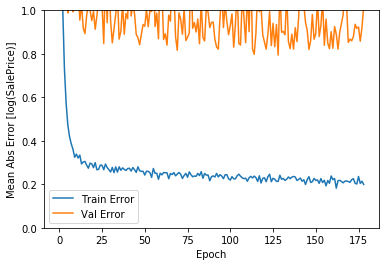

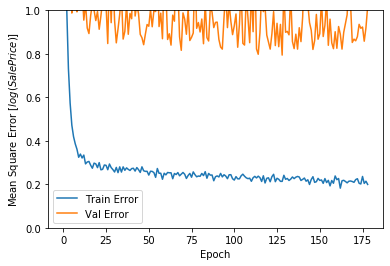

In [290]:
plot_history(history)

In [291]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

290/290 - 0s - loss: 2.7852 - mean_absolute_error: 1.3003 - mean_squared_error: 2.7852


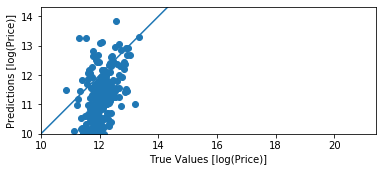

In [292]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [log(Price)]')
plt.ylabel('Predictions [log(Price)]')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])
_ = plt.plot([-1000_000, 1000_000], [-1000_000, 1000_000])

опа

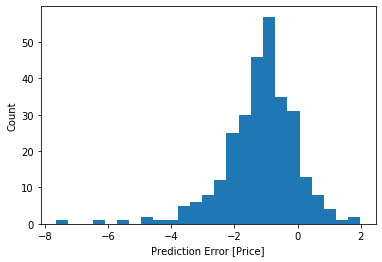

In [293]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

где то что то потерял. сместились данные

In [294]:
missing_values_table(test_final)

Your selected dataframe has 282 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [295]:
result = model.predict(preprocessing.scale(test_final))

In [296]:
result

array([[10.841883 ],
       [11.885569 ],
       [11.215571 ],
       ...,
       [11.523483 ],
       [10.813248 ],
       [11.4457655]], dtype=float32)

In [297]:
Final1 = np.exp(result)

In [298]:
Final1

array([[ 51117.527],
       [145156.62 ],
       [ 74278.09 ],
       ...,
       [101061.375],
       [ 49674.535],
       [ 93504.56 ]], dtype=float32)

In [299]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final1.flatten() }).to_csv('houses_net.csv', index =False)

In [300]:
test.Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [301]:
test = pd.read_csv('house_prices_test.csv', sep=',')

**Блендинг и Стекинг**

In [302]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge

In [303]:
lasso = make_pipeline(RobustScaler(), linear_model.Lasso(alpha =0.00057, random_state=1))

In [304]:
KRR = KernelRidge(alpha=24, kernel='linear', degree=3, coef0=2.5)

In [305]:
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [306]:
model_lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [307]:
model_xgb_deep = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=11, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [308]:
score = cv_rmse(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = cv_rmse(model_xgb_deep)
print("model_xgb_deep score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1117 (0.0212)

ElasticNet score: 0.1138 (0.0224)

Kernel Ridge score: 2.7677 (0.1689)

Xgboost score: 0.1138 (0.0135)

LGBM score: 0.1152 (0.0113)

model_xgb_deep score: 0.1154 (0.0134)



Blend

In [309]:
elastic_model = ENet.fit(train_final, Y)
lasso_model = lasso.fit(train_final, Y)
xgb_model = model_xgb.fit(train_final, Y)
xgb_model_deep = model_xgb_deep.fit(train_final, Y)
lgb_model = model_lgb.fit(train_final, Y)

In [310]:
elastic_model_pred = elastic_model.predict(test_final)
lasso_model_pred = lasso_model.predict(test_final)
xgb_model_pred = xgb_model.predict(test_final)
xgb_model_deep_pred = xgb_model_deep.predict(test_final)
lgb_model_pred = lgb_model.predict(test_final)

сделаем 3 бленда.  среднию оценку / большую для линейныйных моделей / большую для бустинга

In [311]:
Final1=np.exp((elastic_model_pred + lasso_model_pred + xgb_model_pred + xgb_model_deep_pred + lgb_model_pred)/5)

In [312]:
Final2=np.exp((elastic_model_pred*0.35 + lasso_model_pred*0.35 + xgb_model_pred*0.1 + xgb_model_deep_pred*0.1 + 
               lgb_model_pred*0.1))

In [313]:
Final3=np.exp((elastic_model_pred*0.1 + lasso_model_pred*0.1 + xgb_model_pred*0.25 + xgb_model_deep_pred*0.25 + 
               lgb_model_pred*0.3))

In [314]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final3}).to_csv('houses.csv', index =False)


лучшая модель - линейная (Final 2) - 0.117 ошибка на тесте

**Стекинг**

In [315]:
models = (ENet, lasso, model_xgb, model_lgb, model_xgb_deep)

In [343]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We  fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [344]:
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_final.values)
    rmse= np.sqrt(-cross_val_score(model, train_final.values, Y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [345]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, lasso, model_xgb, model_lgb, model_xgb_deep),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1095 (0.0190)


In [346]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [347]:
stacked_averaged_models.fit(train_final.values, Y.values)
stacked_train_pred = stacked_averaged_models.predict(train_final.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_final.values))
print(rmsle(Y, stacked_train_pred))

0.0854678199563705


In [336]:
model_xgb.fit(train_final, Y)
xgb_train_pred = model_xgb.predict(train_final)
xgb_pred = np.expm1(model_xgb.predict(test_final))
print(rmsle(Y, xgb_train_pred))

0.07902910278561313


In [339]:
model_lgb.fit(train_final, Y)
lgb_train_pred = model_lgb.predict(train_final)
lgb_pred = np.expm1(model_lgb.predict(test_final))
print(rmsle(Y, lgb_train_pred))

0.07297054217284368


In [340]:
lasso.fit(train_final, Y)
lasso_train_pred = lasso.predict(train_final)
lasso_pred = np.expm1(lasso.predict(test_final))
print(rmsle(Y, lasso_train_pred))

0.09560167221902137


In [341]:
ensemble = stacked_pred*0.45 + xgb_pred*0.15 + lgb_pred*0.3 + lasso_pred*0.10

In [342]:
pd.DataFrame({'Id': test.Id, 'SalePrice': ensemble}).to_csv('houses.csv', index =False)